In [1]:
import seaborn as sb
import pandas as pd
import numpy as np    
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

In [2]:
data_sale = pd.read_csv('WA-Sales-Win-Loss.csv')

In [3]:
#sayısal olmayan verilerin kontrolü sağlanır.Sayısal olmayan sütunların dönüştürülmesi için
data_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78025 entries, 0 to 78024
Data columns (total 19 columns):
Opportunity Number                         78025 non-null int64
Supplies Subgroup                          78025 non-null object
Supplies Group                             78025 non-null object
Region                                     78025 non-null object
Route To Market                            78025 non-null object
Elapsed Days In Sales Stage                78025 non-null int64
Opportunity Result                         78025 non-null object
Sales Stage Change Count                   78025 non-null int64
Total Days Identified Through Closing      78025 non-null int64
Total Days Identified Through Qualified    78025 non-null int64
Opportunity Amount USD                     78025 non-null int64
Client Size By Revenue                     78025 non-null int64
Client Size By Employee Count              78025 non-null int64
Revenue From Client Past Two Years         78025 non-n

In [4]:
data_sale.head(10)

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,Exterior Accessories,Car Accessories,Northwest,Fields Sales,76,Won,13,104,101,0,5,5,0,Unknown,0.696360,0.113985,0.154215,1
1,1658010,Exterior Accessories,Car Accessories,Pacific,Reseller,63,Loss,2,163,163,0,3,5,0,Unknown,0.000000,1.000000,0.000000,1
2,1674737,Motorcycle Parts,Performance & Non-auto,Pacific,Reseller,24,Won,7,82,82,7750,1,1,0,Unknown,1.000000,0.000000,0.000000,1
3,1675224,Shelters & RV,Performance & Non-auto,Midwest,Reseller,16,Loss,5,124,124,0,1,1,0,Known,1.000000,0.000000,0.000000,1
4,1689785,Exterior Accessories,Car Accessories,Pacific,Reseller,69,Loss,11,91,13,69756,1,1,0,Unknown,0.000000,0.141125,0.000000,4
5,1692390,Shelters & RV,Performance & Non-auto,Pacific,Reseller,89,Loss,3,114,0,232522,5,1,0,Unknown,0.000000,0.000877,0.000000,5
6,1935837,Garage & Car Care,Car Accessories,Pacific,Fields Sales,111,Won,12,112,112,20001,4,5,0,Unknown,0.308863,0.568487,0.122650,2
7,1952571,Exterior Accessories,Car Accessories,Pacific,Fields Sales,82,Loss,6,70,70,450000,1,1,0,Known,0.263610,0.736390,0.000000,6
8,1999486,Batteries & Accessories,Car Accessories,Northwest,Fields Sales,68,Loss,8,156,156,250000,1,5,0,None,0.000000,0.562821,0.437179,6
9,2052337,Exterior Accessories,Car Accessories,Pacific,Reseller,18,Loss,7,50,50,55003,1,1,0,Unknown,0.000000,0.585317,0.414683,4


In [5]:
data_sale.shape

(78025, 19)

In [6]:
data_sale.describe()

,Opportunity Number,Elapsed Days In Sales Stage,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
count,7.802500e+04,78025.000000,78025.000000,78025.000000,78025.000000,78025.000000,78025.000000,78025.000000,78025.000000,78025.000000,78025.000000,78025.000000,78025.000000
mean,7.653429e+06,43.595348,2.955732,16.728356,16.314348,91637.260750,1.620481,1.604050,0.303287,0.203063,0.488314,0.185048,3.436745
std,1.054848e+06,26.585600,1.497242,16.729593,16.562597,133161.029157,1.235796,1.210744,0.930290,0.364985,0.448077,0.340283,1.656890
min,1.641984e+06,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,6.900423e+06,19.000000,2.000000,4.000000,4.000000,15000.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7.545569e+06,43.000000,3.000000,12.000000,12.000000,49000.000000,1.000000,1.000000,0.000000,0.000000,0.448000,0.000000,3.000000
75%,8.228329e+06,65.000000,3.000000,24.000000,24.000000,105099.000000,1.000000,1.000000,0.000000,0.197225,1.000000,0.188552,5.000000
max,1.009427e+07,210.000000,23.000000,208.000000,208.000000,1000000.000000,5.000000,5.000000,4.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
data_sale.columns.values

array(['Opportunity Number', 'Supplies Subgroup', 'Supplies Group',
       'Region', 'Route To Market', 'Elapsed Days In Sales Stage',
       'Opportunity Result', 'Sales Stage Change Count',
       'Total Days Identified Through Closing',
       'Total Days Identified Through Qualified',
       'Opportunity Amount USD', 'Client Size By Revenue',
       'Client Size By Employee Count',
       'Revenue From Client Past Two Years', 'Competitor Type',
       'Ratio Days Identified To Total Days',
       'Ratio Days Validated To Total Days',
       'Ratio Days Qualified To Total Days', 'Deal Size Category'],
      dtype=object)

In [8]:
data_sale.dtypes

Opportunity Number                           int64
Supplies Subgroup                           object
Supplies Group                              object
Region                                      object
Route To Market                             object
Elapsed Days In Sales Stage                  int64
Opportunity Result                          object
Sales Stage Change Count                     int64
Total Days Identified Through Closing        int64
Total Days Identified Through Qualified      int64
Opportunity Amount USD                       int64
Client Size By Revenue                       int64
Client Size By Employee Count                int64
Revenue From Client Past Two Years           int64
Competitor Type                             object
Ratio Days Identified To Total Days        float64
Ratio Days Validated To Total Days         float64
Ratio Days Qualified To Total Days         float64
Deal Size Category                           int64
dtype: object

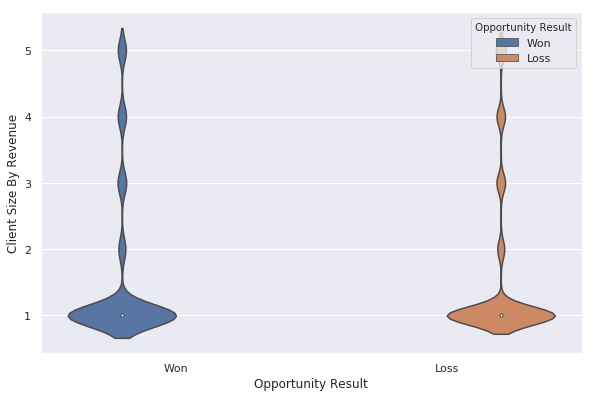

In [10]:
# plotting the violinplot
sb.set(rc={'figure.figsize':(9.7,6.27)})
sb.violinplot(x="Opportunity Result",y="Client Size By Revenue", hue="Opportunity Result", data=data_sale);
plt.show()

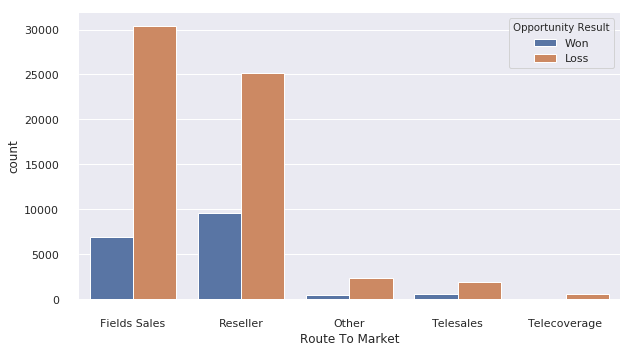

In [11]:
# set the background colour of the plot to white
sb.set(style="whitegrid", color_codes=True)
# setting the plot size for all plots
sb.set(rc={'figure.figsize':(9.7,5.27)})
# create a countplot
sb.countplot('Route To Market',data=data_sale,hue = 'Opportunity Result')
# Remove the top and down margin
sb.despine(offset=10, trim=True)
# display the plotplt.show()

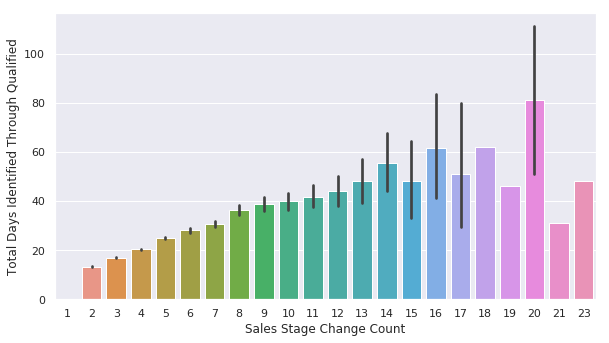

In [12]:
sb.barplot(x='Sales Stage Change Count', y='Total Days Identified Through Qualified', data=data_sale)

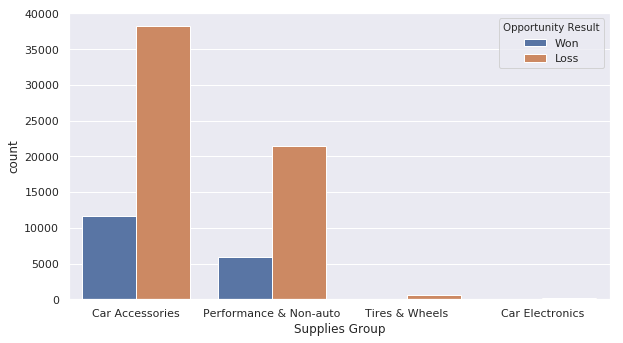

In [13]:
# create a countplot
sb.countplot('Supplies Group',data=data_sale,hue = 'Opportunity Result')

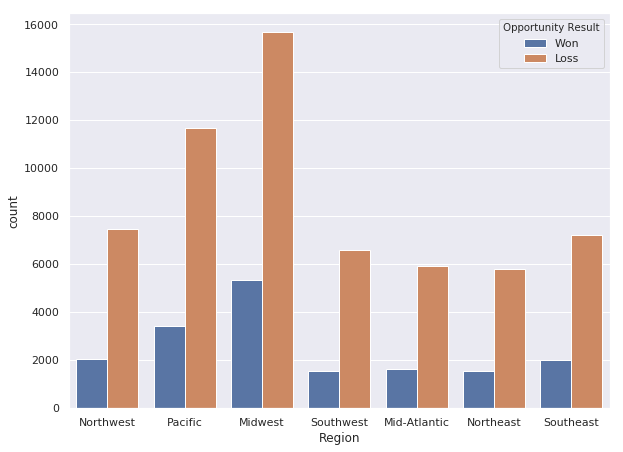

In [14]:
sb.set(rc={'figure.figsize':(9.7,7.27)})
sb.countplot('Region',data=data_sale,hue = 'Opportunity Result')

In [ ]:
#g = sns.FacetGrid(train, col='Survived')
#g.map(plt.hist, 'Age', bins=20)

In [15]:
#Veri ön işleme sayısal olmayan sütunları sayısal yapma işlemi 
print("Competitor Type : ",data_sale['Competitor Type'].unique())
print("Region : ",data_sale['Region'].unique())
print("Opportunity Result : ",data_sale['Opportunity Result'].unique())
print("'Supplies Group : ",data_sale['Supplies Group'].unique())
print("Route To Market : ",data_sale['Route To Market'].unique())
print("Supplies Subgroup' : ",data_sale['Supplies Subgroup'].unique())

Competitor Type :  ['Unknown' 'Known' 'None']
Region :  ['Northwest' 'Pacific' 'Midwest' 'Southwest' 'Mid-Atlantic' 'Northeast'
 'Southeast']
Opportunity Result :  ['Won' 'Loss']
'Supplies Group :  ['Car Accessories' 'Performance & Non-auto' 'Tires & Wheels'
 'Car Electronics']
Route To Market :  ['Fields Sales' 'Reseller' 'Other' 'Telesales' 'Telecoverage']
Supplies Subgroup' :  ['Exterior Accessories' 'Motorcycle Parts' 'Shelters & RV'
 'Garage & Car Care' 'Batteries & Accessories' 'Performance Parts'
 'Towing & Hitches' 'Replacement Parts' 'Tires & Wheels'
 'Interior Accessories' 'Car Electronics']


In [16]:
# create the Labelencoder object
la = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
data_sale['Competitor Type'] = la.fit_transform(data_sale['Competitor Type'])
data_sale['Route To Market'] = la.fit_transform(data_sale['Route To Market'])
data_sale['Supplies Subgroup'] = la.fit_transform(data_sale['Supplies Subgroup'])
data_sale['Opportunity Result'] = la.fit_transform(data_sale['Opportunity Result'])
data_sale['Supplies Group'] = la.fit_transform(data_sale['Supplies Group'])
data_sale['Region'] = la.fit_transform(data_sale['Region'])
#display the initial records
data_sale.head(10)

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,2,0,3,0,76,1,13,104,101,0,5,5,0,2,0.696360,0.113985,0.154215,1
1,1658010,2,0,4,2,63,0,2,163,163,0,3,5,0,2,0.000000,1.000000,0.000000,1
2,1674737,5,2,4,2,24,1,7,82,82,7750,1,1,0,2,1.000000,0.000000,0.000000,1
3,1675224,8,2,1,2,16,0,5,124,124,0,1,1,0,0,1.000000,0.000000,0.000000,1
4,1689785,2,0,4,2,69,0,11,91,13,69756,1,1,0,2,0.000000,0.141125,0.000000,4
5,1692390,8,2,4,2,89,0,3,114,0,232522,5,1,0,2,0.000000,0.000877,0.000000,5
6,1935837,3,0,4,0,111,1,12,112,112,20001,4,5,0,2,0.308863,0.568487,0.122650,2
7,1952571,2,0,4,0,82,0,6,70,70,450000,1,1,0,0,0.263610,0.736390,0.000000,6
8,1999486,0,0,3,0,68,0,8,156,156,250000,1,5,0,1,0.000000,0.562821,0.437179,6
9,2052337,2,0,4,2,18,0,7,50,50,55003,1,1,0,2,0.000000,0.585317,0.414683,4


In [17]:
#verilerin sayısal veri tipine dönüştürüldüğü kontrol edilir.
data_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78025 entries, 0 to 78024
Data columns (total 19 columns):
Opportunity Number                         78025 non-null int64
Supplies Subgroup                          78025 non-null int64
Supplies Group                             78025 non-null int64
Region                                     78025 non-null int64
Route To Market                            78025 non-null int64
Elapsed Days In Sales Stage                78025 non-null int64
Opportunity Result                         78025 non-null int64
Sales Stage Change Count                   78025 non-null int64
Total Days Identified Through Closing      78025 non-null int64
Total Days Identified Through Qualified    78025 non-null int64
Opportunity Amount USD                     78025 non-null int64
Client Size By Revenue                     78025 non-null int64
Client Size By Employee Count              78025 non-null int64
Revenue From Client Past Two Years         78025 non-null i

In [6]:
#print(data_sale.target)
#alttaki eksik veri tespit etme kodlarını yukarı al.Numerik alanları çevirme koduyla yer değiştir.

In [18]:
data_sale.isna().head(10)

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
#Her iki veri kümesindeki toplam eksik değer sayısını alalım.
print(data_sale.isna().sum())

Opportunity Number                         0
Supplies Subgroup                          0
Supplies Group                             0
Region                                     0
Route To Market                            0
Elapsed Days In Sales Stage                0
Opportunity Result                         0
Sales Stage Change Count                   0
Total Days Identified Through Closing      0
Total Days Identified Through Qualified    0
Opportunity Amount USD                     0
Client Size By Revenue                     0
Client Size By Employee Count              0
Revenue From Client Past Two Years         0
Competitor Type                            0
Ratio Days Identified To Total Days        0
Ratio Days Validated To Total Days         0
Ratio Days Qualified To Total Days         0
Deal Size Category                         0
dtype: int64


In [10]:
#Eksik değerlerle başa çıkmanın birkaç yolu vardır: 
#Eksik değerlere sahip satırları kaldırma 
#Eksik değerlere çarpma 
#Sonuncuyu tercih ediyorum çünkü eksik değerlere sahip satırları kaldırırsanız verilerde yetersizliğe neden olabilir ve bu da makinenin verimsiz çalışmasına neden olabilir öğrenme modeli.

#Şimdi, gösterimi gerçekleştirmenin birkaç yolu vardır:

#Etki alanı içinde, diğer tüm değerlerden farklı olarak anlamı olan sabit bir değer.
#Rasgele seçilen başka bir kayıttan alınan değer.
#Sütun için ortalama, medyan veya mod değeri.
#Başka bir makine öğrenimi modeli tarafından tahmin edilen bir değer


In [21]:
# select columns other than 'Opportunity Number','Opportunity Result'
cols = [col for col in data_sale.columns if col not in ['Opportunity Number','Opportunity Result']]
# dropping the 'Opportunity Number'and 'Opportunity Result' columns
data = data_sale[cols]
#assigning the Oppurtunity Result column as target
target = data_sale['Opportunity Result']
data.head(n=5)

,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,2,0,3,0,76,13,104,101,0,5,5,0,2,0.69636,0.113985,0.154215,1
1,2,0,4,2,63,2,163,163,0,3,5,0,2,0.00000,1.000000,0.000000,1
2,5,2,4,2,24,7,82,82,7750,1,1,0,2,1.00000,0.000000,0.000000,1
3,8,2,1,2,16,5,124,124,0,1,1,0,0,1.00000,0.000000,0.000000,1
4,2,0,4,2,69,11,91,13,69756,1,1,0,2,0.00000,0.141125,0.000000,4


In [22]:
#import the necessary module
#from sklearn.model_selection import train_test_split
#split data set into train and test sets
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.30, random_state = 10)

In [23]:
#Accuracy Score
# import the necessary module
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#create an object of the type GaussianNB
gnb = GaussianNB()
#train the algorithm on training data and predict using the testing data
pred = gnb.fit(data_train, target_train).predict(data_test)
#print(pred.tolist())
#print the accuracy score of the model
print("Naive-Bayes accuracy : ",accuracy_score(target_test, pred, normalize = True))

Naive-Bayes accuracy :  0.7590567327409433


In [24]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(target_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84     18066
           1       0.48      0.59      0.53      5342

   micro avg       0.76      0.76      0.76     23408
   macro avg       0.67      0.70      0.68     23408
weighted avg       0.78      0.76      0.77     23408



In [25]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(target_test, pred))

[[14613  3453]
 [ 2187  3155]]


In [26]:
#Accuracy Score
#import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#create object of the lassifier
neigh = KNeighborsClassifier(n_neighbors=3)
#Train the algorithm
neigh.fit(data_train, target_train)
# predict the response
pred = neigh.predict(data_test)
# evaluate accuracy
print ("KNeighbors accuracy score : ",accuracy_score(target_test, pred))

KNeighbors accuracy score :  0.8145505809979494


In [27]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(target_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88     18066
           1       0.62      0.50      0.55      5342

   micro avg       0.81      0.81      0.81     23408
   macro avg       0.74      0.70      0.72     23408
weighted avg       0.80      0.81      0.81     23408



In [28]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(target_test, pred))

[[16400  1666]
 [ 2675  2667]]


In [29]:
#import the necessary modules
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
#create an object of type LinearSVC
svc_model = LinearSVC(random_state=0)
#train the algorithm on training data and predict using the testing data
pred = svc_model.fit(data_train, target_train).predict(data_test)
#print the accuracy score of the model
print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))

LinearSVC accuracy :  0.4606971975393028


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [30]:
from sklearn import tree
from sklearn.metrics import accuracy_score
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(data_train, target_train).predict(data_test)
print("DesicionTree accuracy : ",accuracy_score(target_test, pred, normalize = True))

DesicionTree accuracy :  0.4606971975393028
